# Clustering - Cereals Dataset

In [1]:
import pandas as pd
import numpy as np

##### Dataset Description
* name: Name of cereal
* calories: calories per serving
* protein: grams of protein
* fat: grams of fat
* sodium: milligrams of sodium
* fiber: grams of dietary fiber
* carbo: grams of complex carbohydrates
* sugars: grams of sugars
* potass: milligrams of potassium
* vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
* shelf: display shelf (1, 2, or 3, counting from the floor)
* weight: weight in ounces of one serving
* cups: number of cups in one serving
* rating: rating of the cereals (Possibly from Consumer Reports)

### Reading data

In [2]:
cereals=pd.read_csv('Cereals.csv')

In [3]:
cereals.head(10)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
9,Bran_Flakes,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813


### Aggregating "name", "shelf" and "rating" to make labels

In [4]:
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

In [5]:
cereals.shape

(77, 12)

In [6]:
cereals

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33,100%_Bran (3 - 68.4)
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00,100%_Natural_Bran (3 - 33.98)
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33,All-Bran (3 - 59.43)
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.0,0.50,All-Bran_with_Extra_Fiber (3 - 93.7)
4,110,2,2,200,1.0,14.0,8.0,NaN,25,1.0,0.75,Almond_Delight (3 - 34.38)
...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3.0,60.0,25,1.0,0.75,Triples (3 - 39.11)
73,110,1,1,140,0.0,13.0,12.0,25.0,25,1.0,1.00,Trix (2 - 27.75)
74,100,3,1,230,3.0,17.0,3.0,115.0,25,1.0,0.67,Wheat_Chex (1 - 49.79)
75,100,3,1,200,3.0,17.0,3.0,110.0,25,1.0,1.00,Wheaties (1 - 51.59)


# Data Exploration

In [7]:
cereals.label.value_counts()

Grape_Nuts_Flakes (3 - 52.08)        1
Fruity_Pebbles (2 - 28.03)           1
Lucky_Charms (2 - 26.73)             1
Golden_Grahams (2 - 23.8)            1
Clusters (3 - 40.4)                  1
                                    ..
100%_Bran (3 - 68.4)                 1
Cinnamon_Toast_Crunch (2 - 19.82)    1
Raisin_Bran (2 - 39.26)              1
Quaker_Oatmeal (1 - 50.83)           1
Rice_Krispies (1 - 40.56)            1
Name: label, Length: 77, dtype: int64

### Check summary statistics

In [8]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,1.029610,0.821039
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.150477,0.232716
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,1.500000,1.500000


### Decouple label from the features

In [9]:
cereal_label = cereals['label']
cereals.drop('label', axis=1, inplace=True)

### Check missing values

In [10]:
cereals.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
weight      0
cups        0
dtype: int64

### Imputation

In [13]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
imputed_cereals=pd.DataFrame(mean_imputer.fit_transform(cereals),columns=cereals.columns)

### Checking for NAs again

In [14]:
imputed_cereals.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
weight      0
cups        0
dtype: int64

### Standardization

In [15]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
standardizer.fit(imputed_cereals)

std_X = standardizer.transform(imputed_cereals)
std_cereals = pd.DataFrame(std_X, columns= imputed_cereals.columns)

In [16]:
std_cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-1.258012e-16,5.767392e-17,1.013349e-16,-5.190653e-17,1.463476e-16,-4.527403e-16,-2.144749e-16,-4.758099e-17,5.190653e-17,-1.982541e-16,1.665335e-16
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-2.938605e+00,-1.420902e+00,-1.013072e+00,-1.917189e+00,-9.088244e-01,-2.542013e+00,-1.625929e+00,-1.212115e+00,-1.272550e+00,-3.542628e+00,-2.469891e+00
25%,-3.555846e-01,-5.014948e-01,-1.013072e+00,-3.563056e-01,-4.864980e-01,-7.267769e-01,-9.317120e-01,-7.774919e-01,-1.462701e-01,-1.980675e-01,-6.532825e-01
50%,1.610194e-01,4.179123e-01,-1.298811e-02,2.440343e-01,-6.417167e-02,-4.606439e-16,-6.089621e-03,-1.255577e-01,-1.462701e-01,-1.980675e-01,-3.072619e-01
75%,1.610194e-01,4.179123e-01,9.870962e-01,6.042382e-01,3.581547e-01,5.698204e-01,9.195328e-01,3.090651e-01,-1.462701e-01,-1.980675e-01,7.740527e-01
max,2.744040e+00,3.176134e+00,3.987349e+00,1.924986e+00,5.003745e+00,2.125737e+00,1.845155e+00,3.351425e+00,3.232570e+00,3.146493e+00,2.936682e+00


#### Note - Clustering is an unsupervised method and hence we are not concerned about train-test split or prediction accuracies.



## Agglomerative Clustering


<IPython.core.display.Javascript object>


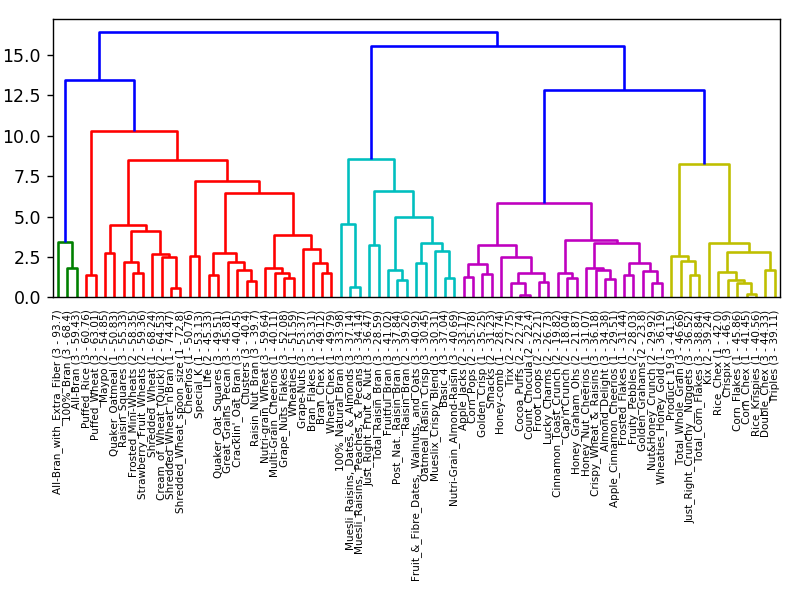

In [29]:
import matplotlib.pyplot as plt
%matplotlib notebook
#Type the code here

from scipy.cluster.hierarchy import linkage, dendrogram

#preparing linkage matrix

linkage_matrix = linkage(std_cereals, method='ward', metric='euclidean')
fig, axis = plt.subplots()

dendrogram(linkage_matrix, labels=list(cereal_label))
plt.tight_layout()
plt.show()

In [18]:
#Type the code here
from sklearn.cluster import AgglomerativeClustering

## Instantiating Object
agg_clust = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

## Train model and return class labels
agg_clusters= agg_clust.fit_predict(std_cereals)

## Label - Cluster
agg_result = agg_clust.fit_predict(std_cereals)

## Label - Cluster
agg_result = pd.DataFrame({"label":cereal_label,"agg_cluster":agg_clusters})

agg_result.head()

,label,agg_cluster
0,100%_Bran (3 - 68.4),3
1,100%_Natural_Bran (3 - 33.98),0
2,All-Bran (3 - 59.43),3
3,All-Bran_with_Extra_Fiber (3 - 93.7),3
4,Almond_Delight (3 - 34.38),4


In [19]:
agg_clusters

array([3, 0, 3, 3, 4, 4, 4, 0, 2, 2, 4, 2, 4, 2, 4, 1, 1, 4, 4, 2, 2, 1,
       4, 1, 4, 4, 2, 0, 0, 4, 4, 4, 2, 2, 2, 4, 4, 4, 1, 0, 1, 2, 4, 2,
       0, 0, 0, 2, 4, 0, 2, 0, 0, 1, 5, 5, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2,
       4, 2, 2, 1, 0, 1, 1, 4, 2, 2, 4], dtype=int64)

## K-Means Clustering
**Parameter description**

n_clusters : The number of clusters to find.

n_init : Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

max_iter : Maximum number of iterations of the k-means algorithm for a single run.


In [20]:
#Type the code here
from sklearn.cluster import KMeans

kmeans_object = KMeans()

kmeans_object.fit(std_cereals)

kmeans_clusters = kmeans_object.predict(std_cereals)

kmeans_results = pd.DataFrame({"label":cereal_label,"kmeans_cluster":kmeans_clusters})
kmeans_results.head()

,label,kmeans_cluster
0,100%_Bran (3 - 68.4),4
1,100%_Natural_Bran (3 - 33.98),7
2,All-Bran (3 - 59.43),4
3,All-Bran_with_Extra_Fiber (3 - 93.7),4
4,Almond_Delight (3 - 34.38),0


In [21]:
kmeans_object.labels_

array([4, 7, 4, 4, 0, 0, 0, 2, 6, 6, 0, 1, 0, 6, 0, 1, 1, 0, 0, 6, 3, 1,
       0, 1, 0, 0, 3, 2, 2, 0, 0, 0, 6, 6, 6, 0, 0, 0, 5, 5, 1, 6, 0, 3,
       7, 7, 2, 1, 0, 2, 1, 2, 2, 5, 3, 3, 6, 6, 2, 6, 3, 1, 1, 3, 3, 3,
       0, 1, 3, 5, 2, 5, 1, 0, 6, 1, 0])

In [22]:
kmeans_object.cluster_centers_

array([[ 0.20798344, -0.91940708,  0.03247027,  0.12396629, -0.65926792,
        -0.59711721,  0.99316184, -0.70922536, -0.14627013, -0.19806746,
         0.20980312],
       [-0.07741319,  0.13501782, -0.55149506,  0.97367816, -0.45401139,
         1.18819763, -0.93171203, -0.55460839, -0.14627013, -0.19806746,
         0.90048338],
       [ 1.25162795,  0.41791231,  0.43149382,  0.4174658 ,  0.71009334,
         0.06558811,  0.94524452,  1.1944078 ,  0.22915654,  2.14312471,
        -0.49949558],
       [-1.18215105, -0.04179123, -0.91306402, -1.80312481, -0.06417167,
         0.284569  , -1.13997707, -0.10575821, -0.82203813, -0.98069456,
         0.1858176 ],
       [-2.24979938,  1.33731939, -0.34634956,  0.20401161,  3.73676565,
        -2.10981415, -0.77744163,  3.06167606, -0.14627013, -0.19806746,
        -1.87877244],
       [ 0.26434025,  0.05014948, -0.21300498,  0.62825181, -0.31756749,
         1.03659548, -0.51518194, -0.42979364,  3.23256986,  0.20327977,
         0.557

### Inspecting cluster centroids to understand average statistics of each cluster

In [23]:
# inverse_transform is used to Scale back the data to the original representation
cluster_centroids = pd.DataFrame(standardizer.inverse_transform(kmeans_object.cluster_centers_),columns=cereals.columns)

## Using Inverse_Transform to retrieve actual values from stardized data
cluster_centroids.to_csv('best_kmeans_cluster_centroids.csv')

cluster_centroids

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,110.909091,1.545455,1.045455,170.000000,0.590909,12.500000,11.318182,49.712121,25.000000,1.000,0.869545
1,105.384615,2.692308,0.461538,240.769231,1.076923,19.384615,3.000000,60.384615,25.000000,1.000,1.029231
2,131.111111,3.000000,1.444444,194.444444,3.833333,15.055556,11.111111,181.111111,33.333333,1.350,0.705556
3,84.000000,2.500000,0.100000,9.500000,2.000000,15.900000,2.100000,91.366667,10.000000,0.883,0.864000
4,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.000000,1.000,0.386667
5,112.000000,2.600000,0.800000,212.000000,1.400000,18.800000,4.800000,69.000000,100.000000,1.060,0.950000
6,102.500000,3.250000,1.500000,144.166667,3.016667,13.691886,5.585526,118.750000,22.916667,1.000,0.567500
7,140.000000,3.666667,3.666667,86.666667,2.666667,13.333333,10.000000,158.333333,16.666667,1.000,1.000000


In [24]:
#Type the code here
wss={}


for k in range(1,21):
    kmeans_loop=KMeans(n_clusters=k, n_init=30, n_jobs=2, random_state=1000,verbose=0).fit(std_cereals)
    clusters=kmeans_loop.labels_
    wss[k]=kmeans_loop.inertia_

In [25]:
wss

{1: 846.9999999999999,
 2: 686.1907115207284,
 3: 584.7237118058638,
 4: 489.2454641375005,
 5: 411.6473261000441,
 6: 354.24493350305426,
 7: 314.03022959743225,
 8: 276.2790231881626,
 9: 247.42481441736913,
 10: 229.8360075538547,
 11: 207.5189681359663,
 12: 188.17502321694695,
 13: 168.9885864397974,
 14: 153.09943358938295,
 15: 141.726492321529,
 16: 134.13081471557894,
 17: 129.23199501805345,
 18: 122.36999466018688,
 19: 116.59112466958399,
 20: 113.5074076192916}

<IPython.core.display.Javascript object>


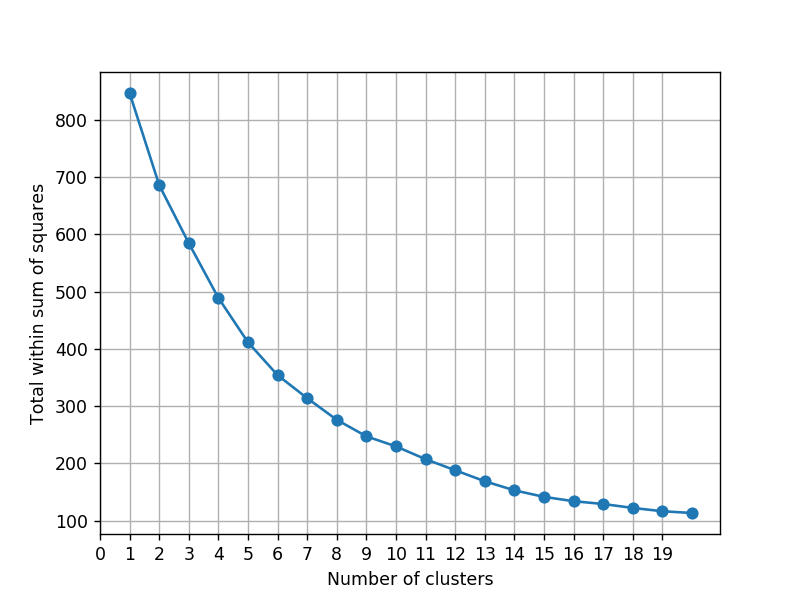

In [28]:
import matplotlib.pyplot as plt
plt.figure()
# %matplotlib notebook

plt.plot(list(wss.keys()),list(wss.values()),marker='o')

# plt.plot(list(wss.keys()),list(wss.values()))
plt.grid()
plt.xlabel('Number of clusters')
plt.xticks(np.arange(0, 20, step=1))
plt.ylabel('Total within sum of squares')
plt.show()


### How to select best K value for K-Means -> Silhouette Analysis
**Higher the silhouette score better the clustering**

*The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.*

Automatically created module for IPython interactive environment


<IPython.core.display.Javascript object>


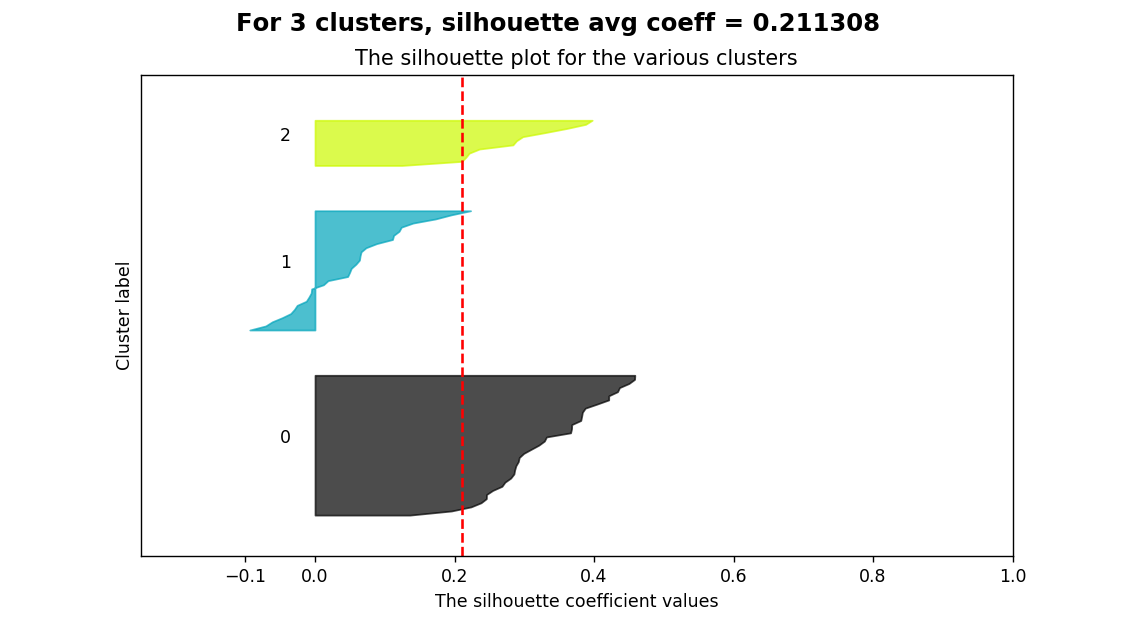

<IPython.core.display.Javascript object>


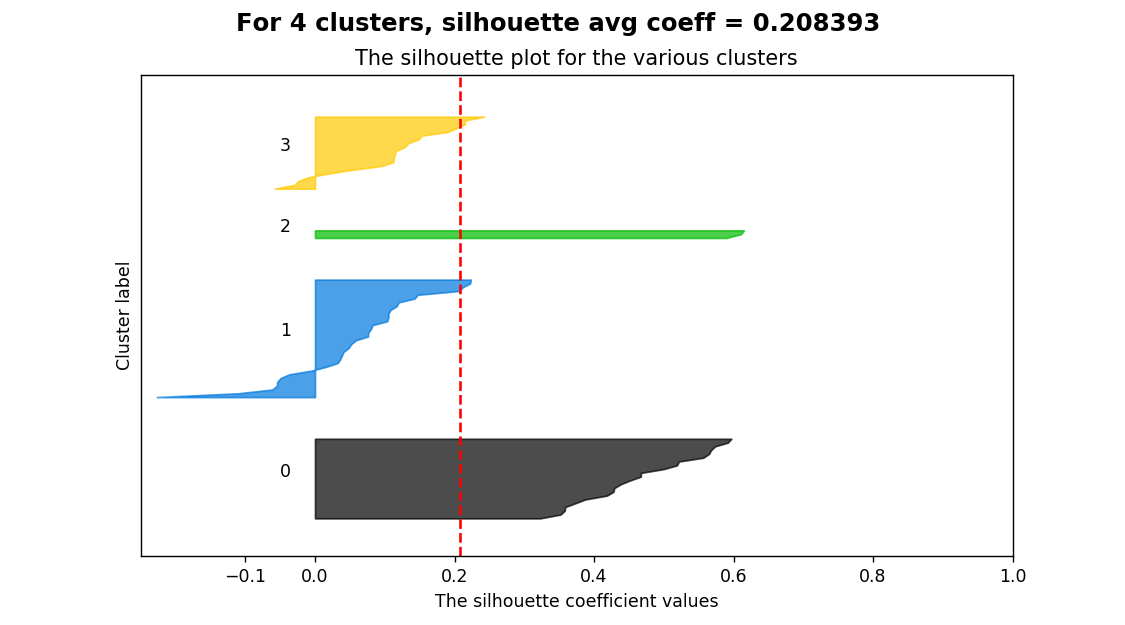

<IPython.core.display.Javascript object>


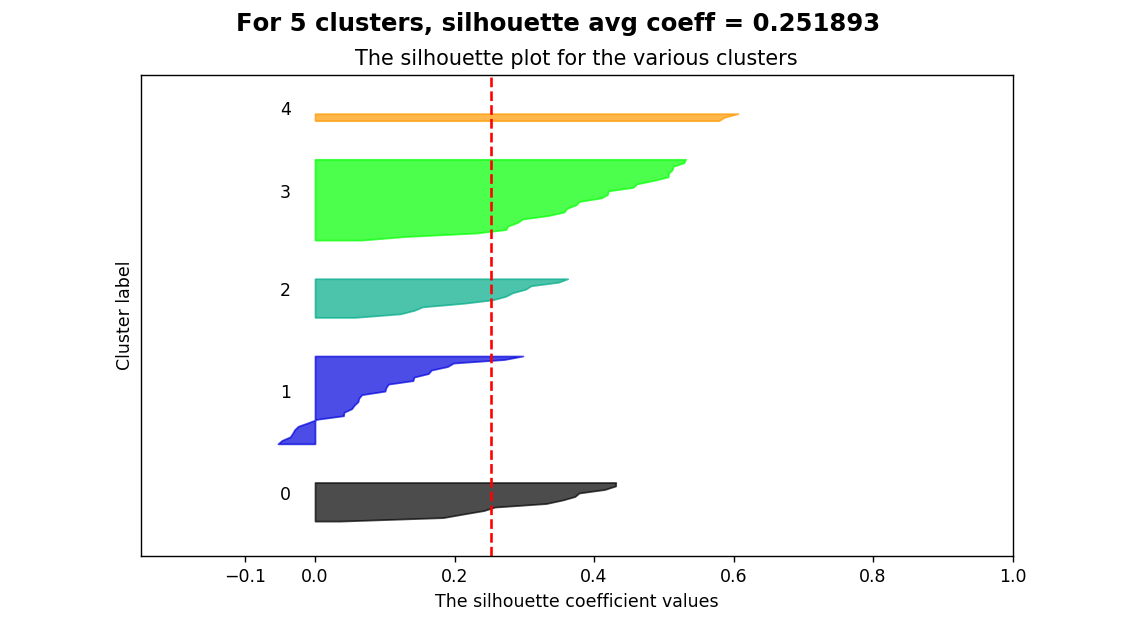

<IPython.core.display.Javascript object>


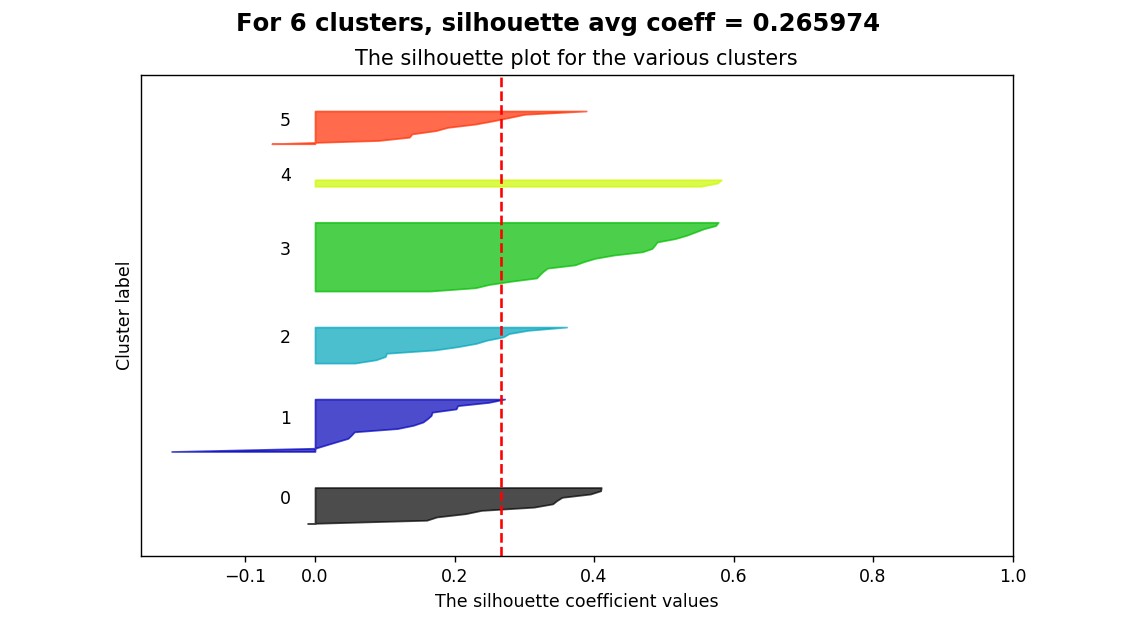

<IPython.core.display.Javascript object>


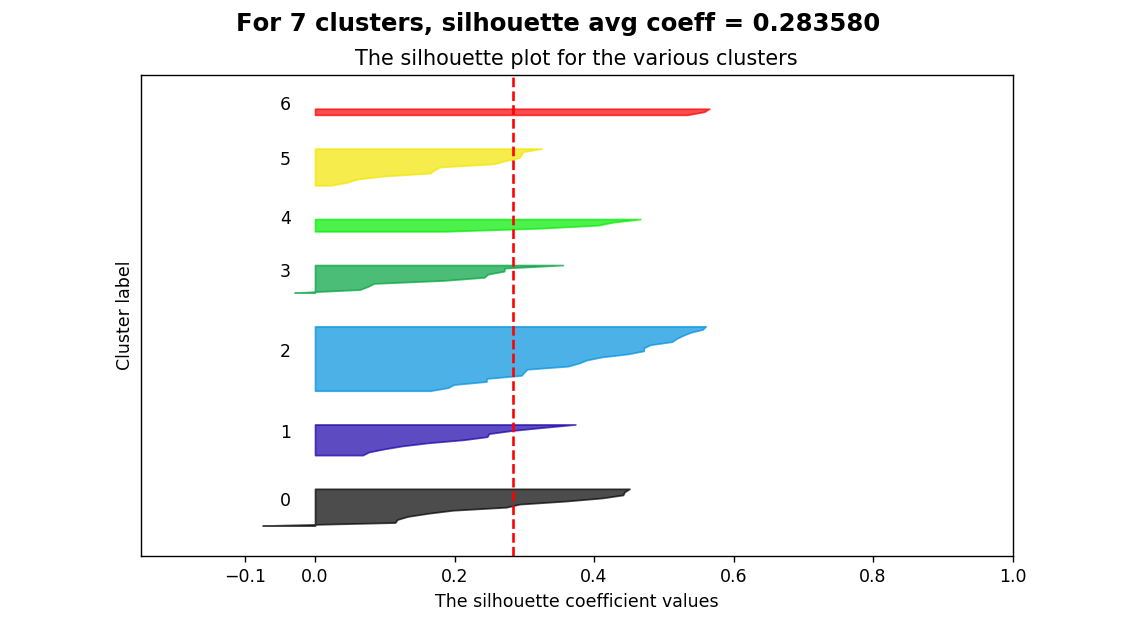

<IPython.core.display.Javascript object>


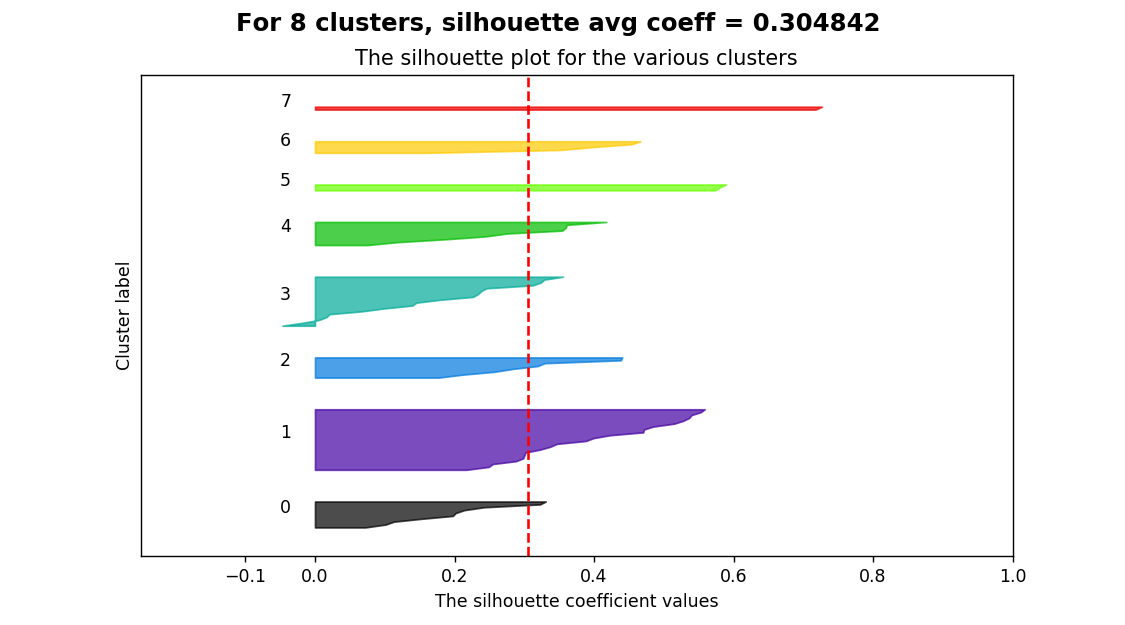

<IPython.core.display.Javascript object>


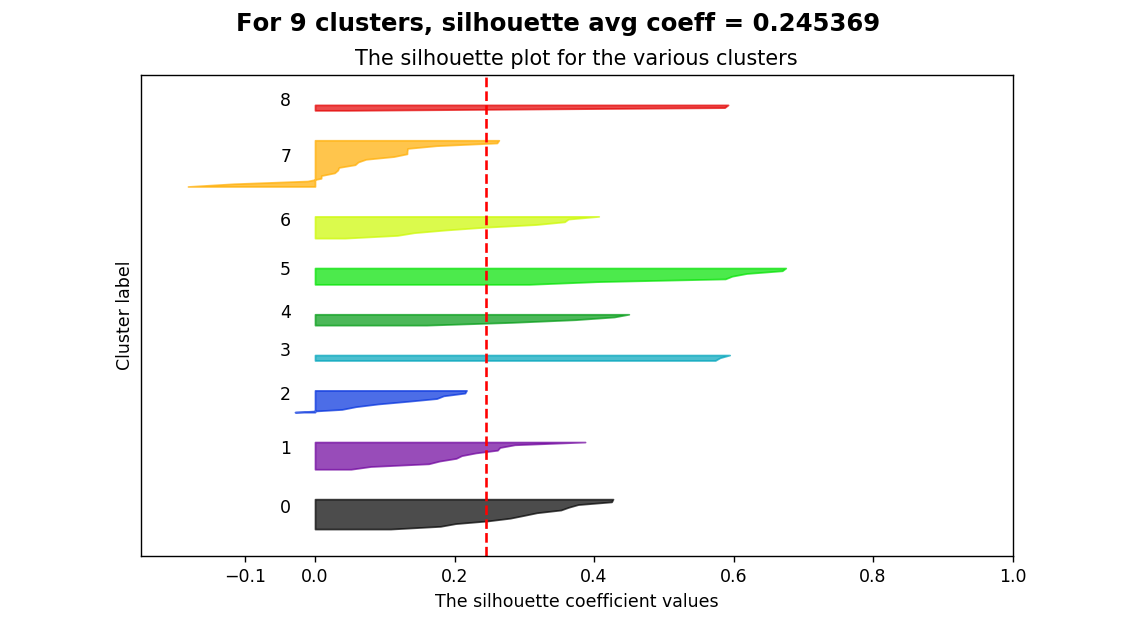

<IPython.core.display.Javascript object>


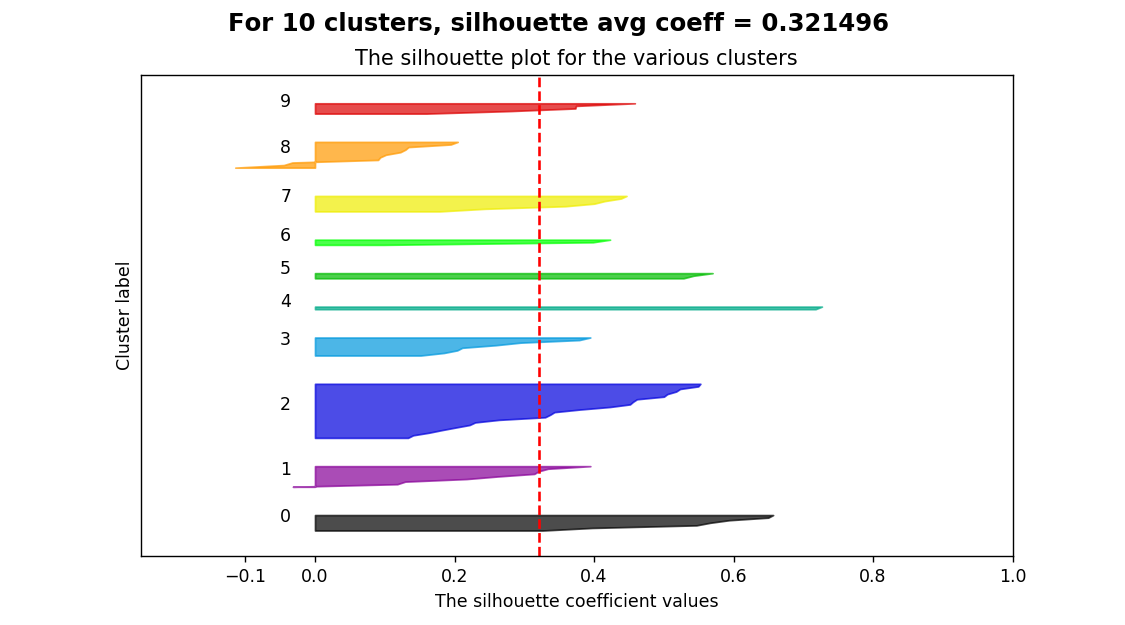

<IPython.core.display.Javascript object>


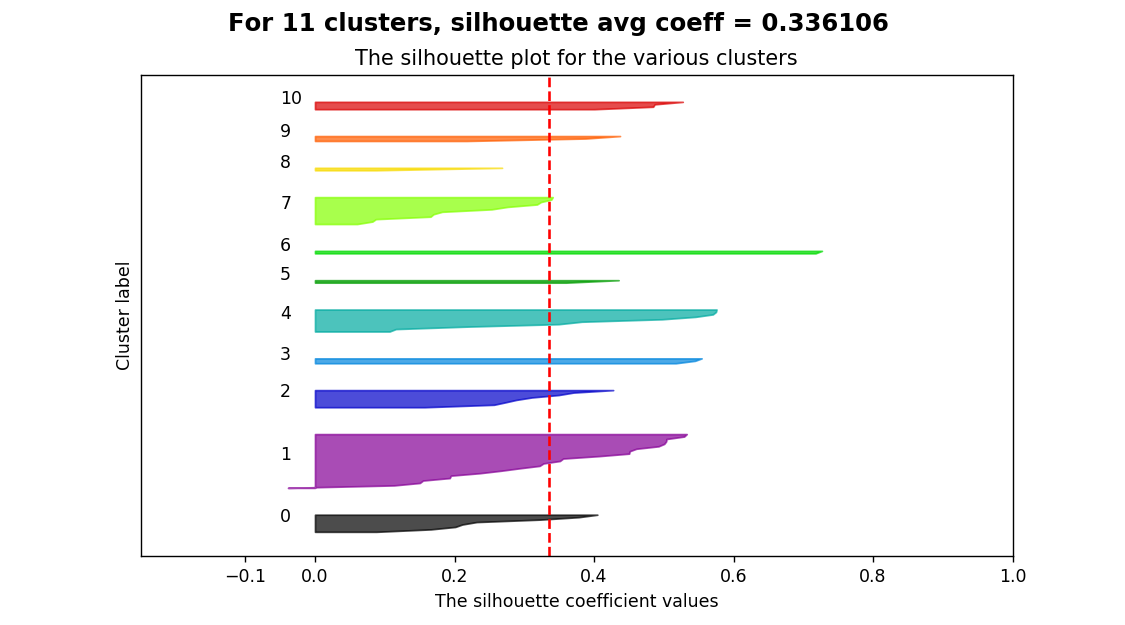

In [31]:
## Standard plotting code copied from sklearn documentation.
## Just change "X_matrix" to the data of your choice

from __future__ import print_function

# from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# plt.figure()

print(__doc__)

### Just change this to your dataframe
X_matrix = std_cereals

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, +1 
    
    ax1.set_xlim([-0.25, .5])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    ax1.set_ylim([0, len(X_matrix) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

### Note - Higher the silhouette score better the clustering.
Hence best K value for this dataset is 8-9

In [32]:
best_kmeans = KMeans(n_clusters=8, random_state=1240)
best_kmeans.fit(std_cereals)
best_kmeans_labels = best_kmeans.predict(std_cereals)

In [33]:
kmeans_results = pd.DataFrame({"label":cereal_label,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head()

,label,kmeans_cluster
0,100%_Bran (3 - 68.4),6
1,100%_Natural_Bran (3 - 33.98),3
2,All-Bran (3 - 59.43),6
3,All-Bran_with_Extra_Fiber (3 - 93.7),6
4,Almond_Delight (3 - 34.38),2


### Add Cluster Labels to Original Data

In [34]:
cereals = pd.read_csv("Cereals.csv")
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

final_cluster_data = pd.merge(cereals, kmeans_results, on='label')
final_cluster_data.head(10)


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label,kmeans_cluster
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.00,0.33,100%_Bran (3 - 68.4),6
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.00,1.00,100%_Natural_Bran (3 - 33.98),3
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.00,0.33,All-Bran (3 - 59.43),6
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.00,0.50,All-Bran_with_Extra_Fiber (3 - 93.7),6
4,110,2,2,200,1.0,14.0,8.0,NaN,25,1.00,0.75,Almond_Delight (3 - 34.38),2
5,110,2,2,180,1.5,10.5,10.0,70.0,25,1.00,0.75,Apple_Cinnamon_Cheerios (1 - 29.51),2
6,110,2,0,125,1.0,11.0,14.0,30.0,25,1.00,1.00,Apple_Jacks (2 - 33.17),2
7,130,3,2,210,2.0,18.0,8.0,100.0,25,1.33,0.75,Basic_4 (3 - 37.04),7
8,90,2,1,200,4.0,15.0,6.0,125.0,25,1.00,0.67,Bran_Chex (1 - 49.12),0
9,90,3,0,210,5.0,13.0,5.0,190.0,25,1.00,0.67,Bran_Flakes (3 - 53.31),0


In [35]:
final_cluster_data.shape

(77, 13)

### Post-Process Clusters 

In [36]:
analysis = final_cluster_data.groupby(['kmeans_cluster']).mean().reset_index()
analysis

,kmeans_cluster,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,0,97.058824,3.058824,0.352941,115.882353,2.588235,16.470588,3.647059,106.562500,20.588235,1.000000,0.766471
1,1,108.571429,1.857143,0.285714,261.428571,0.285714,21.571429,2.714286,36.428571,25.000000,1.000000,1.054286
2,2,110.434783,1.565217,1.043478,172.173913,0.652174,12.608696,11.086957,49.318182,25.000000,1.000000,0.875217
3,3,117.000000,3.800000,2.700000,119.500000,2.620000,12.833333,7.000000,129.000000,20.000000,1.000000,0.742000
4,4,116.666667,2.666667,0.833333,208.333333,1.833333,18.166667,6.333333,95.833333,100.000000,1.133333,0.958333
5,5,60.000000,1.666667,0.000000,0.000000,1.333333,13.000000,0.000000,53.333333,0.000000,0.610000,1.000000
6,6,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.000000,1.000000,0.386667
7,7,130.000000,3.000000,1.500000,195.000000,3.812500,15.062500,10.750000,175.000000,25.000000,1.331250,0.668750


In [37]:
final_cluster_data.kmeans_cluster.value_counts()

2    23
0    17
3    10
7     8
1     7
4     6
6     3
5     3
Name: kmeans_cluster, dtype: int64

#### References:

* https://kapilddatascience.wordpress.com/2015/11/10/using-silhouette-analysis-for-selecting-the-number-of-cluster-for-k-means-clustering/
* https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html